In [1]:
import os
from dotenv import load_dotenv

import numpy as np
import itertools

import matplotlib.pyplot as plt

import json

import googlemaps
import gmaps

from utils.google_maps import GoogleMaps
from utils.graph import Graph
from utils import utils

# Get Google API key from:
# https://developers.google.com/maps/documentation/distance-matrix/start#get-a-key
load_dotenv('.env')

password = os.getenv('API_KEY')
gmaps.configure(password)

%load_ext autoreload
%autoreload 2

In [2]:
# Places of interest
places = 'Heidelberg', 'Ulm', 'Lindau', 'Füssen', 'Lindehof Palace', 'Prien am Chiemsee', 'Berchtesgaden', 'Königssee', 'Nördlingen', 'Rottemburg ob der Taube', 'Würzburg'

# Location
Location = 'Germany'

# Mode
Mode = 'driving'  # 'driving', 'walking', 'bicycling', 'transit'

In [3]:
# Get lat and lng
lat = []
lng = []

google_maps = GoogleMaps(password)
for place in places:
    print(place)
    result = google_maps.get_address_recommendation(query=place, language='en', location=Location)
    lat = np.append(lat, result[0]['lat'])
    lng = np.append(lng, result[0]['lng'])

lat = lat.astype(float)
lng = lng.astype(float)

lat, lng

Heidelberg
Ulm
Lindau
Füssen
Lindehof Palace
Prien am Chiemsee
Berchtesgaden
Königssee
Nördlingen
Rottemburg ob der Taube
Würzburg


(array([49.3987524, 48.4010822, 47.5797815, 47.569648 , 47.5716123,
        47.8561815, 47.6301796, 47.5541796, 48.8508157, 49.3801834,
        49.7913044]),
 array([ 8.6724335,  9.9876076,  9.6789333, 10.7004328, 10.9608242,
        12.3490983, 13.0000742, 12.9783744, 10.4894906, 10.1867388,
         9.9533548]))

In [6]:
gmaps = googlemaps.Client(key=password)

dist_matrix = []

for i in range(len(places)):
    for j in range(len(places)):
        x = (lat[i], lng[i])
        y = (lat[j], lng[j])
        directions_result = gmaps.directions(x, y, mode=Mode, avoid='ferries',)
        dist_matrix.append(directions_result[0]['legs'][0]['distance']['value'])

dist_matrix = np.reshape(dist_matrix, (len(places), len(places)))
dist_matrix.astype(int)
dist_matrix

array([[     0, 203405, 318298, 327932, 365012, 434085, 500662, 506066,
        203387, 165970, 165303],
       [202134,      0, 116982, 126616, 163696, 245247, 311824, 317228,
         89840, 137269, 196905],
       [317758, 117336,      0,  99566, 136645, 265234, 331811, 337215,
        189969, 237398, 297034],
       [326561, 126139,  98763,      0,  44846, 156182, 222760, 228164,
        198771, 246200, 305836],
       [363026, 162604, 135228,  42505,      0, 133959, 200537, 205941,
        183966, 282665, 342301],
       [432174, 246058, 265029, 155999, 134026,      0,  77903,  83307,
        232939, 344024, 366608],
       [500530, 314414, 333385, 224355, 202382,  78953,      0,   6515,
        301295, 412380, 434964],
       [504995, 318879, 337850, 228820, 206847,  83418,   6393,      0,
        305760, 416845, 439429],
       [202545,  84261, 183597, 193231, 184106, 234203, 300780, 306184,
             0,  85561, 145198],
       [164087, 137853, 237189, 246823, 283903, 345268,

In [7]:
# Convert dist_matrix to a symmetrical matrix
dist_matrix = np.asmatrix(dist_matrix)

for i in range(0, len(places), 1):
    for j in range(i+1, len(places), 1):
        dist_matrix[j,i] = dist_matrix[i,j]
dist_matrix = np.asarray(dist_matrix)
dist_matrix

array([[     0, 203405, 318298, 327932, 365012, 434085, 500662, 506066,
        203387, 165970, 165303],
       [203405,      0, 116982, 126616, 163696, 245247, 311824, 317228,
         89840, 137269, 196905],
       [318298, 116982,      0,  99566, 136645, 265234, 331811, 337215,
        189969, 237398, 297034],
       [327932, 126616,  99566,      0,  44846, 156182, 222760, 228164,
        198771, 246200, 305836],
       [365012, 163696, 136645,  44846,      0, 133959, 200537, 205941,
        183966, 282665, 342301],
       [434085, 245247, 265234, 156182, 133959,      0,  77903,  83307,
        232939, 344024, 366608],
       [500662, 311824, 331811, 222760, 200537,  77903,      0,   6515,
        301295, 412380, 434964],
       [506066, 317228, 337215, 228164, 205941,  83307,   6515,      0,
        305760, 416845, 439429],
       [203387,  89840, 189969, 198771, 183966, 232939, 301295, 305760,
             0,  85561, 145198],
       [165970, 137269, 237398, 246200, 282665, 344024,

In [8]:
source_node = 0
debug = True
debug_folder = r'output/1/'

if not os.path.exists(debug_folder):
    os.makedirs(debug_folder)
else:
    print("Output directory already exists")
    exit(1)

Output directory already exists


Initial graph
Edge: (0, 1) = 203405
Edge: (0, 2) = 318298
Edge: (0, 3) = 327932
Edge: (0, 4) = 365012
Edge: (0, 5) = 434085
Edge: (0, 6) = 500662
Edge: (0, 7) = 506066
Edge: (0, 8) = 203387
Edge: (0, 9) = 165970
Edge: (0, 10) = 165303
Edge: (1, 2) = 116982
Edge: (1, 3) = 126616
Edge: (1, 4) = 163696
Edge: (1, 5) = 245247
Edge: (1, 6) = 311824
Edge: (1, 7) = 317228
Edge: (1, 8) = 89840
Edge: (1, 9) = 137269
Edge: (1, 10) = 196905
Edge: (2, 3) = 99566
Edge: (2, 4) = 136645
Edge: (2, 5) = 265234
Edge: (2, 6) = 331811
Edge: (2, 7) = 337215
Edge: (2, 8) = 189969
Edge: (2, 9) = 237398
Edge: (2, 10) = 297034
Edge: (3, 4) = 44846
Edge: (3, 5) = 156182
Edge: (3, 6) = 222760
Edge: (3, 7) = 228164
Edge: (3, 8) = 198771
Edge: (3, 9) = 246200
Edge: (3, 10) = 305836
Edge: (4, 5) = 133959
Edge: (4, 6) = 200537
Edge: (4, 7) = 205941
Edge: (4, 8) = 183966
Edge: (4, 9) = 282665
Edge: (4, 10) = 342301
Edge: (5, 6) = 77903
Edge: (5, 7) = 83307
Edge: (5, 8) = 232939
Edge: (5, 9) = 344024
Edge: (5, 10) = 36

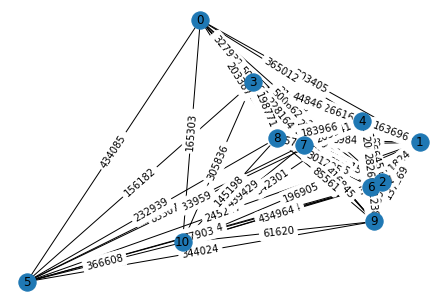

In [9]:
# Create graph from distance matrix
initial_g = utils.from_numpy_matrix(dist_matrix)

if debug:
    print("Initial graph")
    utils.print_edges_with_weight(initial_g)
    initial_g.plot_graph(os.path.join(debug_folder, 'graph.png'))


MST
Edge: (6, 7) = 6515
Edge: (6, 5) = 77903
Edge: (3, 4) = 44846
Edge: (3, 2) = 99566
Edge: (4, 5) = 133959
Edge: (9, 10) = 61620
Edge: (9, 8) = 85561
Edge: (10, 0) = 165303
Edge: (8, 1) = 89840
Edge: (1, 2) = 116982


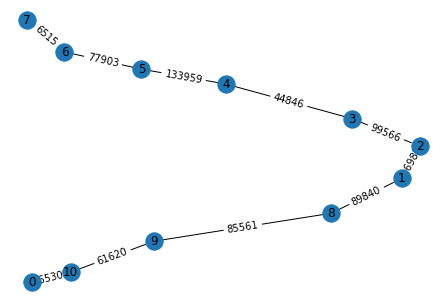

In [10]:
# Create MST
mst_graph = utils.get_mst(initial_g)
if debug:
    print('\nMST')
    utils.print_edges_with_weight(mst_graph)
    mst_graph.plot_graph(os.path.join(debug_folder, 'mst.png'))

In [11]:
mst_degrees = utils.get_degrees(mst_graph)
if debug:
    print(f"\nMST degree: {mst_degrees}")

odd_degrees = utils.get_nodes_odd_degrees(mst_degrees)
if debug:
    print(f"\nMST odd degree: {odd_degrees}")


MST degree: {6: 2, 7: 1, 3: 2, 4: 2, 9: 2, 10: 2, 5: 2, 8: 2, 1: 2, 2: 2, 0: 1}

MST odd degree: {7: 1, 0: 1}



Subgraph:
Edge: (0, 7) = 506066


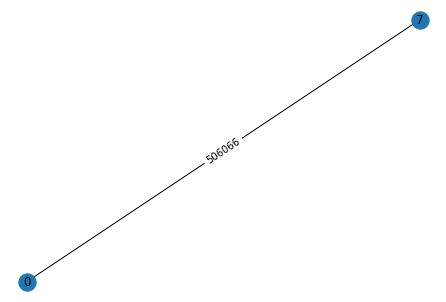

In [12]:
subgraph = utils.create_subgraph(initial_g, odd_degrees)
if debug:
    print("\nSubgraph:")
    utils.print_edges_with_weight(subgraph)
    subgraph.plot_graph(os.path.join(debug_folder, 'subgraph.png'))


Minimum weight perfect match:
Edge: (0, 7) = 506066


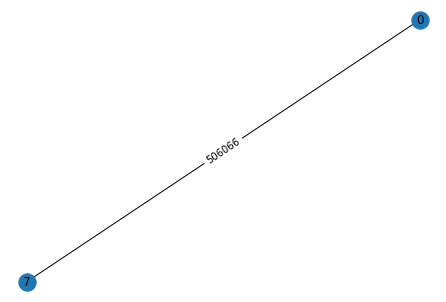

In [13]:
minimum_perfect_match = utils.create_minimum_weight_perfect_matching(subgraph)
if debug:
    print("\nMinimum weight perfect match:")
    utils.print_edges_with_weight(minimum_perfect_match)
    minimum_perfect_match.plot_graph(os.path.join(debug_folder, 'minimum_perfect_match.png'))


Union graph details:
Edge: (6, 7)
Edge: (6, 5)
Edge: (7, 0)
Edge: (5, 4)
Edge: (3, 4)
Edge: (3, 2)
Edge: (2, 1)
Edge: (9, 10)
Edge: (9, 8)
Edge: (10, 0)
Edge: (8, 1)


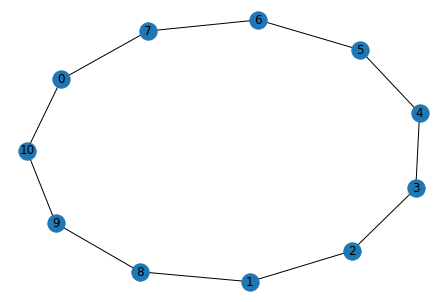

In [14]:
union_graph = utils.union_graphs(mst_graph, minimum_perfect_match)
if debug:
    print("\nUnion graph details:")
    utils.print_edges_with_weight(union_graph)
    union_graph.plot_graph(os.path.join(debug_folder, 'union_graph.png'))


 Euler tour: [(0, 10), (10, 9), (9, 8), (8, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)]


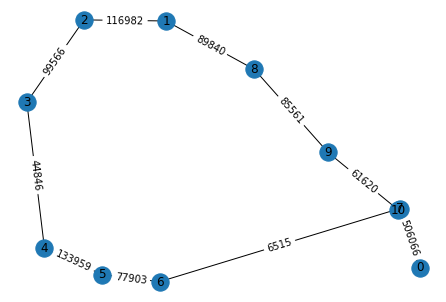

In [15]:
euler_tour_itr = union_graph.get_euler_tour(source_node)

euler_tour = []
for e in euler_tour_itr:
    euler_tour.append(e)

if debug:
    print(f"\n Euler tour: {euler_tour}")
    euler_g = Graph()
    for e in euler_tour:
        euler_g.add_edge(e[0], e[1], initial_g.get_edge_weight(e[0], e[1]))
    euler_g.plot_graph(os.path.join(debug_folder, 'euler_tour.png'))


Path: [0, 10, 9, 8, 1, 2, 3, 4, 5, 6, 7, 0]
Total traveling cost: 1388161


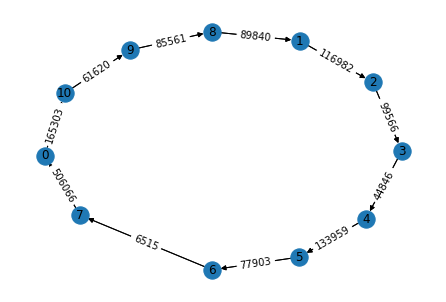

In [16]:
euler_tour = list(itertools.chain.from_iterable(list(euler_tour)))
euler_tour = list(dict.fromkeys(euler_tour).keys())
euler_tour.append(source_node)
print(f"\nPath: {euler_tour}")

if debug:
    final_path = Graph(di_graph=True)
    for i in range(len(euler_tour) - 1):
        final_path.add_edge(euler_tour[i], 
                            euler_tour[i + 1], 
                            initial_g.get_edge_weight(euler_tour[i], euler_tour[i + 1]))
    
    final_path.plot_graph(os.path.join(debug_folder, 'output.png'))

total_weight = utils.get_total_cost(initial_g, euler_tour)
print(f"Total traveling cost: {total_weight}")

In [17]:
ord_places = []
for i in range(len(places)):
    ord_places.append(places[euler_tour[i]])

In [18]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  Heidelberg
1  =  Würzburg
2  =  Rottemburg ob der Taube
3  =  Nördlingen
4  =  Ulm
5  =  Lindau
6  =  Füssen
7  =  Lindehof Palace
8  =  Prien am Chiemsee
9  =  Berchtesgaden
10  =  Königssee


In [19]:
# Sort lat and lng according to tour
new_lat = []
new_lng = []
idx = []

for i in euler_tour[:]:
    new_lat = np.append(new_lat, lat[i])
    new_lng = np.append(new_lng, lng[i])
    idx.append(i)

new_lat, new_lng

(array([49.3987524, 49.7913044, 49.3801834, 48.8508157, 48.4010822,
        47.5797815, 47.569648 , 47.5716123, 47.8561815, 47.6301796,
        47.5541796, 49.3987524]),
 array([ 8.6724335,  9.9533548, 10.1867388, 10.4894906,  9.9876076,
         9.6789333, 10.7004328, 10.9608242, 12.3490983, 13.0000742,
        12.9783744,  8.6724335]))

In [20]:
# draw lines and points (option)

import gmaps
gmaps.configure(api_key=password)

center = (np.mean(new_lat).astype(float), np.mean(new_lng).astype(float))
poi_locations = list(zip(new_lat, new_lng))

# fix too many tool box
fig = gmaps.figure(center=center, zoom_level=13)


fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(ord_places))  
]))

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Line((new_lat[i], new_lng[i]), 
               (new_lat[i + 1], new_lng[i + 1]), 
               stroke_weight=3.0) for i in range(len(ord_places))
]))   

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  Heidelberg
1  =  Würzburg
2  =  Rottemburg ob der Taube
3  =  Nördlingen
4  =  Ulm
5  =  Lindau
6  =  Füssen
7  =  Lindehof Palace
8  =  Prien am Chiemsee
9  =  Berchtesgaden
10  =  Königssee


In [22]:
# Draw real route

import gmaps
gmaps.configure(api_key=password)

fig = gmaps.figure(center=center, zoom_level=13)

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(places))  
]))

for i in range(len(places)):
    fig.add_layer(
        gmaps.directions.Directions((new_lat[i], new_lng[i]), (new_lat[i+1], new_lng[i+1]), mode='WALKING', show_markers=False)
    )

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])


legend: 

0  =  Heidelberg
1  =  Würzburg
2  =  Rottemburg ob der Taube
3  =  Nördlingen
4  =  Ulm
5  =  Lindau
6  =  Füssen
7  =  Lindehof Palace
8  =  Prien am Chiemsee
9  =  Berchtesgaden
10  =  Königssee
